In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

In [2]:
df = pd.read_csv('features.csv')

## EDA

In [3]:
df.head()

,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Sex,Age,Species,Call,File Name
0,2,706,1,0.083313,0.015951,848.0,263.00,-3.270038,1526.165771,0.101744,18.307605,0.734437,0.117970,NaN,A,A. jubatus,growl,Acinonyx_jubatus_S0612_02
1,21,3456,4,0.296424,0.035485,3645.5,452.25,-2.419156,1377.502653,0.625990,18.523777,0.682254,0.112089,NaN,A,A. jubatus,NaN,Acinonyx_jubatus_S0612_02
2,8,2984,5,0.171860,0.022913,2181.8,308.00,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.211802,NaN,A,A. jubatus,growl,Acinonyx_jubatus_S0612_02
3,11,3108,5,0.243933,0.023587,3437.0,314.00,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.147876,NaN,A,A. jubatus,NaN,Acinonyx_jubatus_S0612_02
4,5,1919,3,0.194653,0.029304,2189.0,331.00,-2.780607,942.326097,0.370894,18.787422,0.632496,0.193519,NaN,A,A. jubatus,growl,Acinonyx_jubatus_S0612_02


In [4]:
df.shape

(606, 18)

In [5]:
df.columns.values

array(['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram', 'Tempogram',
       'Sex', 'Age', 'Species', 'Call', 'File Name'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Partials           606 non-null    int64  
 1   Zero_Crossings     606 non-null    int64  
 2   Duration           606 non-null    int64  
 3   Amp_range          606 non-null    float64
 4   Avg_amp            606 non-null    float64
 5   Freq_range         606 non-null    float64
 6   Pulses_per_Sec     606 non-null    float64
 7   MFCC               606 non-null    float64
 8   Spectral Rolloff   606 non-null    float64
 9   Melspectrogram     606 non-null    float64
 10  Spectral Contrast  606 non-null    float64
 11  Chromagram         606 non-null    float64
 12  Tempogram          606 non-null    float64
 13  Sex                405 non-null    object 
 14  Age                437 non-null    object 
 15  Species            606 non-null    object 
 16  Call               593 non

In [7]:
df.describe(include='all')

,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram,Sex,Age,Species,Call,File Name
count,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,606.000000,405,437,606,593,606
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,11,18,37,111
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,Adult,Ocelot,growl,Leopardus_Pardalis_SoundsFiles
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213,276,113,220,113
mean,13.262376,10375.399340,5.693069,0.243260,0.024690,4952.482170,670.145633,-5.801938,3754.562957,0.791486,18.499721,0.705104,0.165910,NaN,NaN,NaN,NaN,NaN
std,26.573002,16082.698274,7.754808,0.245438,0.028946,3276.910697,649.646743,3.084488,1960.387799,2.889716,1.421796,0.088868,0.058358,NaN,NaN,NaN,NaN,NaN
min,0.000000,281.000000,1.000000,0.003207,0.000551,1.000000,0.000000,-14.324327,472.488169,0.000100,12.954071,0.196460,0.009798,NaN,NaN,NaN,NaN,NaN
25%,1.000000,2482.250000,2.000000,0.065170,0.005972,2359.500000,251.725000,-8.660103,2032.147528,0.015124,17.594131,0.652052,0.126073,NaN,NaN,NaN,NaN,NaN
50%,5.000000,4754.000000,3.000000,0.168142,0.016122,4133.083333,439.500000,-5.794813,3760.177145,0.132644,18.341881,0.716829,0.161689,NaN,NaN,NaN,NaN,NaN
75%,14.000000,11442.750000,6.000000,0.319435,0.033408,7638.187500,835.291667,-3.069494,5253.195317,0.580200,19.259454,0.771592,0.214996,NaN,NaN,NaN,NaN,NaN


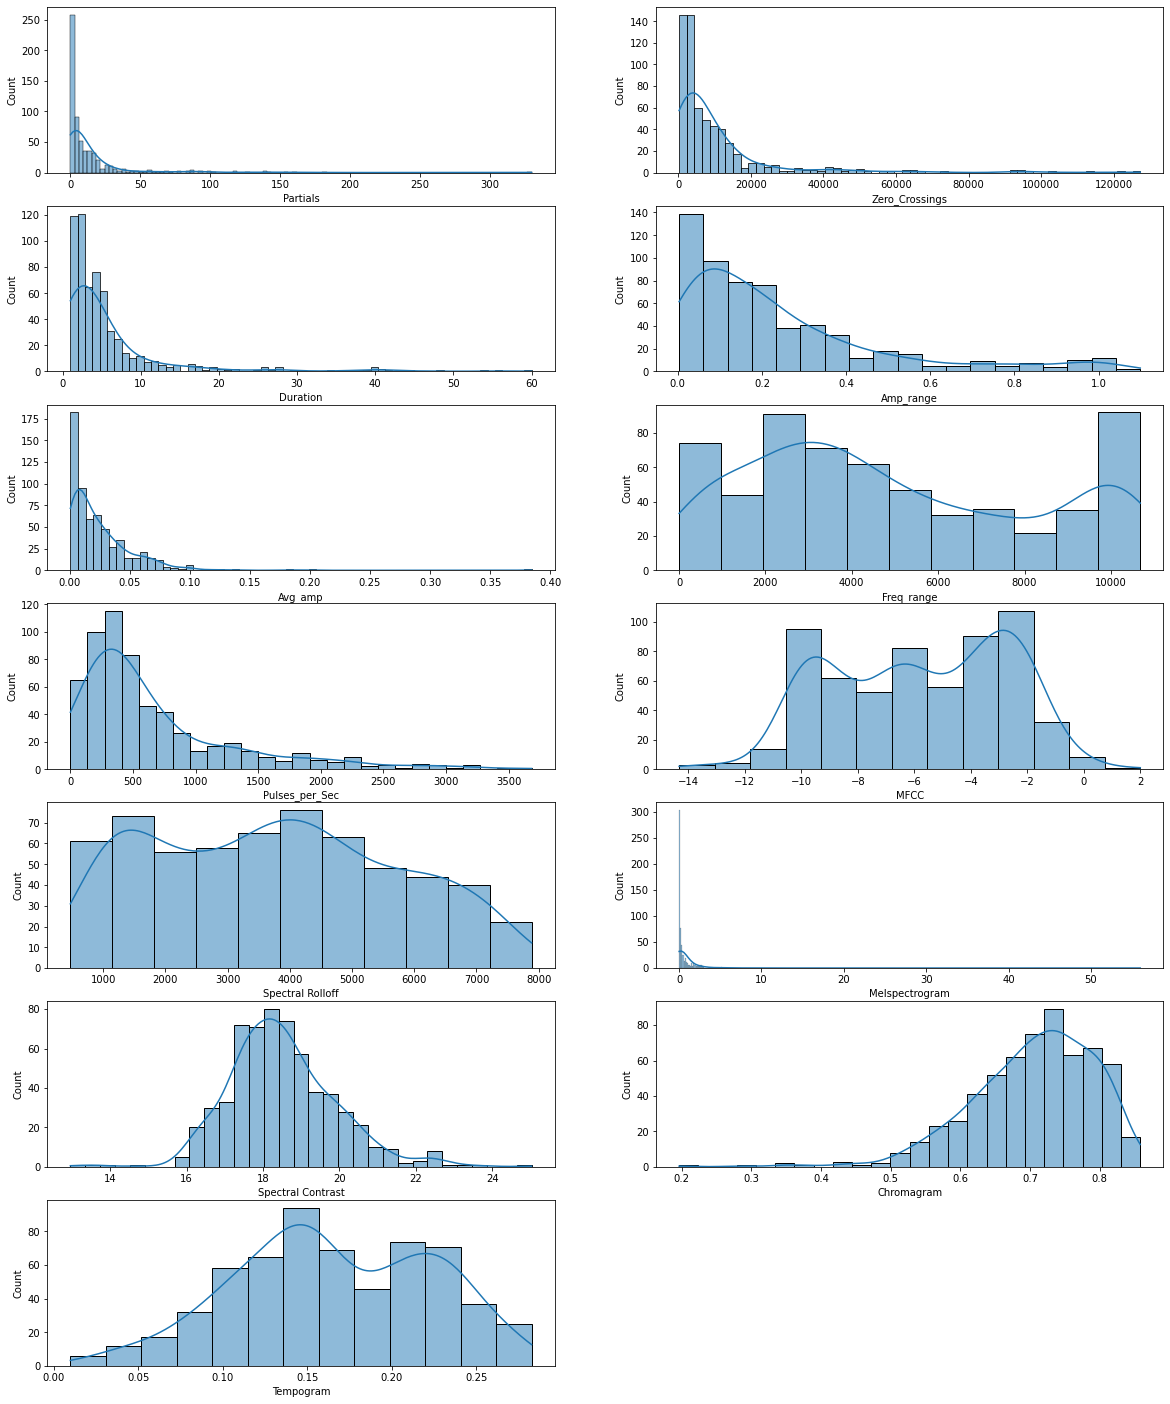

In [8]:
#Histogram to check distribution and skewness
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(20,25))
for i in range(len(l)):
    plt.subplot(7,2,i+1)
    sns.histplot(df[l[i]],kde=True) 
plt.show()

C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\exant\anaconda3\lib\si

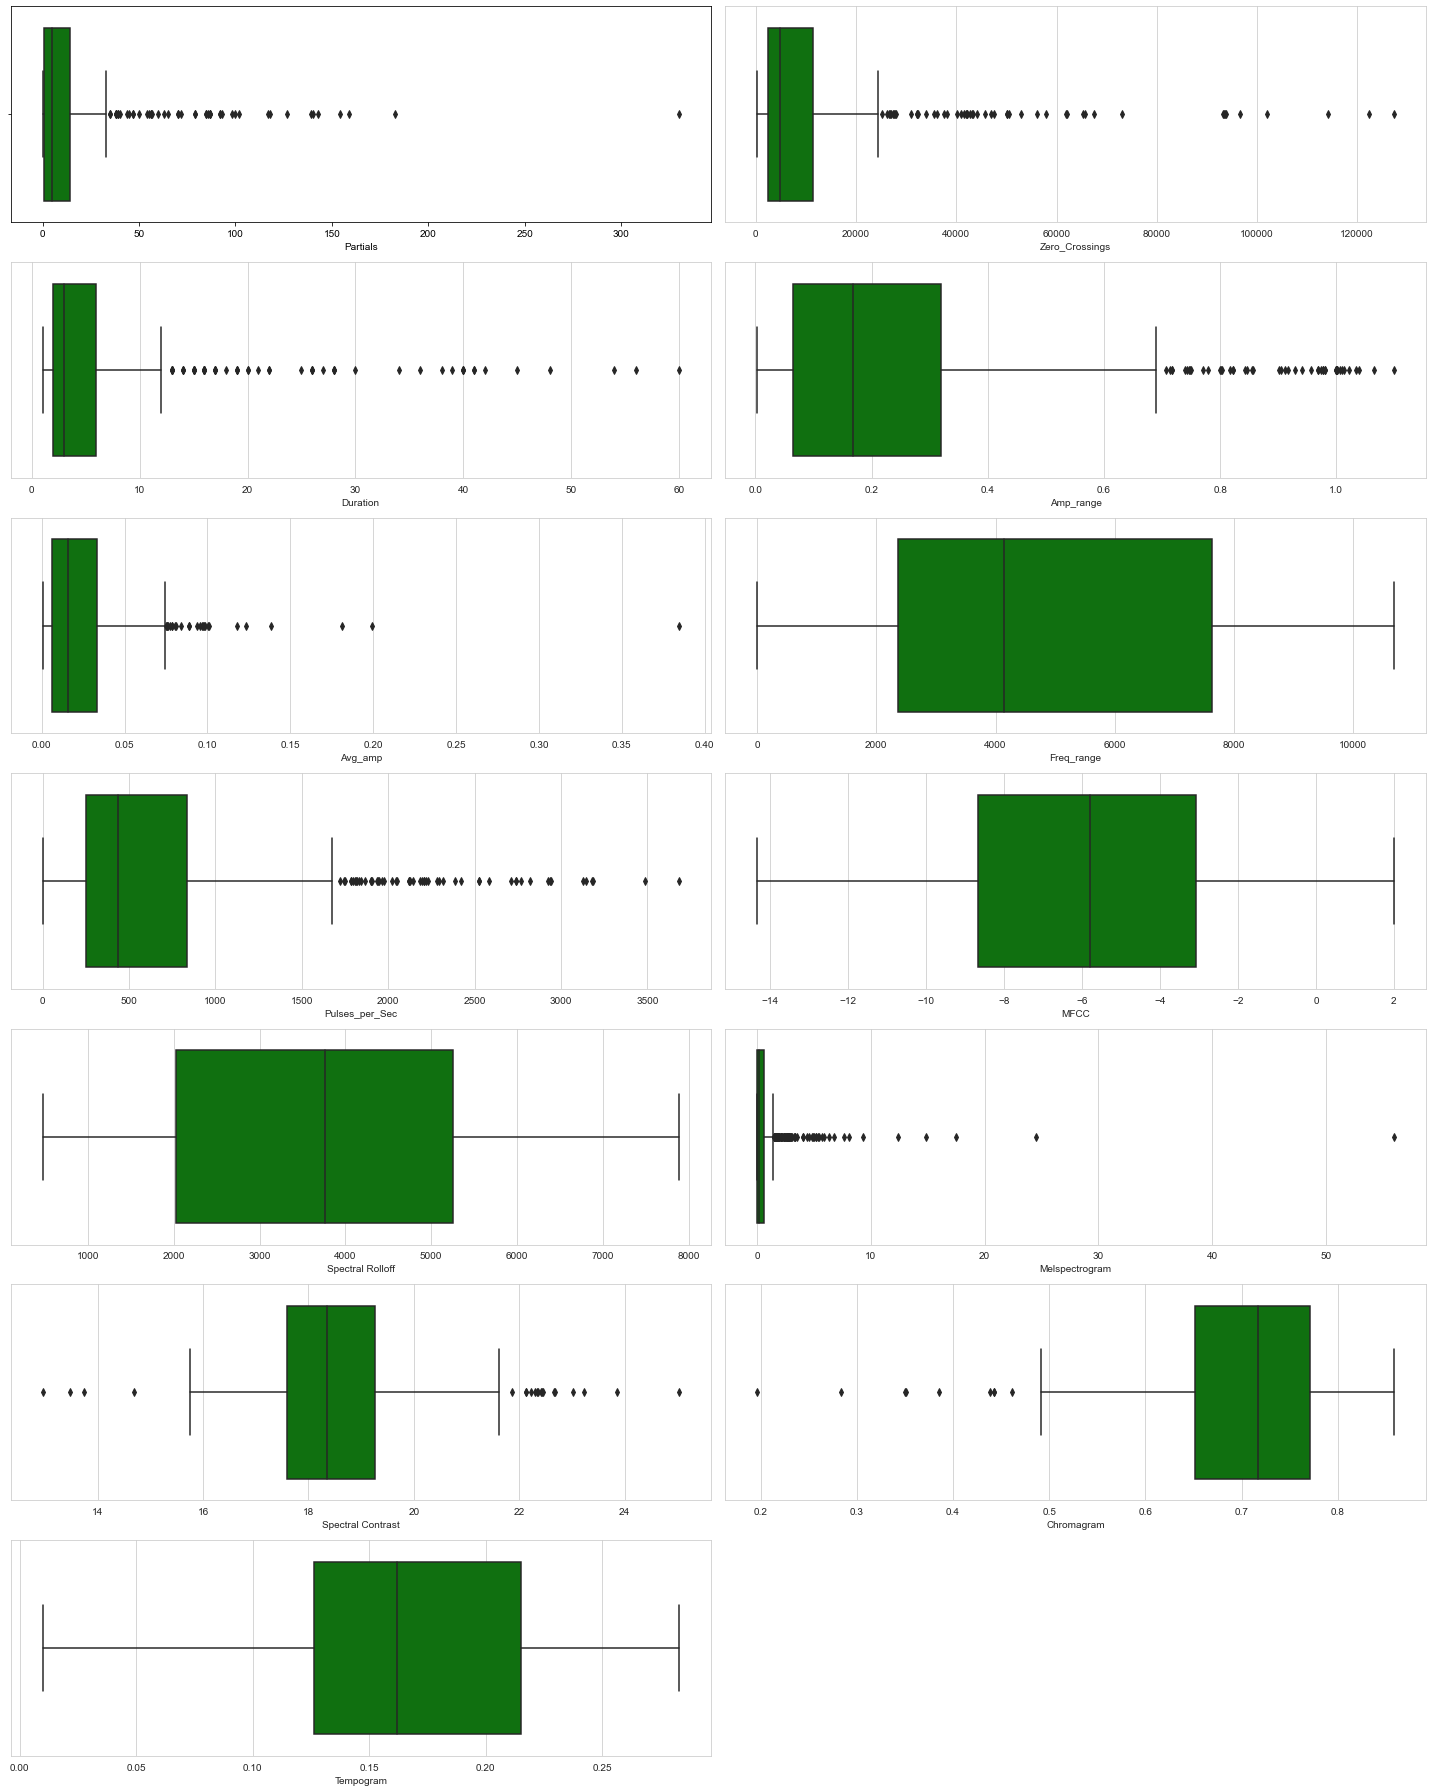

In [9]:
#Boxplot to check for outliers
l= ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram','Tempogram']

plt.figure(figsize=(20,25))

for i in range(0,len(l)):
    plt.subplot(7,2,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='h')
    plt.tight_layout()
plt.show()    

<AxesSubplot:>

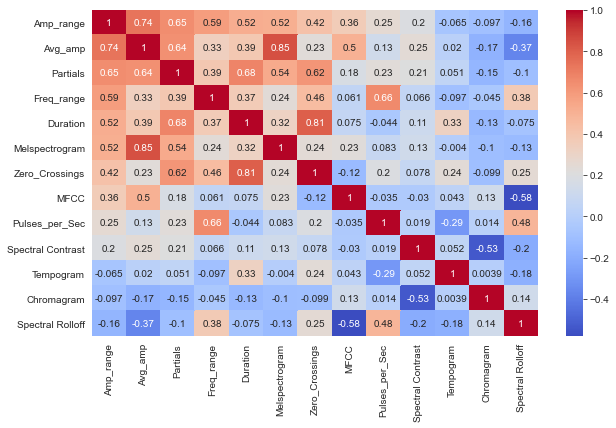

In [10]:
#Quality correlation matrix
k = 13 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Amp_range')['Amp_range'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'coolwarm')

In [11]:
df['Call'].value_counts()

growl                          220
hiss                            54
main call                       46
Prusten                         44
roaring sequence                29
Roaring sequence                23
call                            21
growl?                          21
call?                           18
single call?                    14
Roaring sequence                11
Hiss                            10
Growl                            8
mew?                             7
purr                             7
unknown                          6
roar                             5
puff                             5
purr sequence                    4
call sequence                    4
roar?                            4
growl/hiss                       4
call/growl                       4
hiss                             3
Growl                            3
Mew                              3
mew                              2
roar or call                     2
grow/hiss           

In [12]:
df['Species'].value_counts()

Ocelot              113
L. lynx              81
L. serval            64
Domestic Cat         58
A. jubatus           53
Wildcat              47
Leopard              41
Caracal Carcal       30
Clouded leopard      29
Lion                 27
Jaguar               11
jaguar               11
Bobcat               10
C. temminckii         7
Lion                  7
Snow Leopard          7
Clouded Leopard       6
Leopard               4
Name: Species, dtype: int64

## Data Cleansing

In [13]:
df['Call'].unique()

array(['growl', nan, 'growl?', 'hiss', 'hiss?', 'Growl', 'Hiss',
       'Loud rumble/roar', 'Sharp Hiss', 'call', 'unknown', 'growl/hiss',
       'call sequence', 'purr', 'purr sequence', 'main call',
       'call/growl', 'Call sequence(possible mew)', 'mew', 'hiss ',
       'call sequence?', 'single call?', 'call?', 'mew?', 'grow/hiss',
       'Prusten', 'Roaring sequence ', 'Roaring sequence',
       'roaring sequence', 'puff', 'Mew', 'roar', 'roar or call',
       'growl ', 'roar?', 'Growl ', 'Roaring seqeunce',
       'Roaring Sequence'], dtype=object)

In [14]:
clean = {'unknown':np.NaN, 'growl?': 'growl','Growl':'growl', 'growl ':'growl', 'hiss?':'hiss', 'Hiss':'hiss', 
         'Sharp Hiss':'hiss', 'purr sequence': 'purr', 'Loud rumble/roar':'roar', 'call?':'call', 'main call':'call', 
         'call sequence':'call', 'roar or call':'roar', 'roar?':'roar', 'purr sequence':'purr', ' roar':'roar', 'hiss ':'hiss', 
         'mew?':'mew', 'Call sequence(possible mew)':'call', 'call sequence?':'call', 'single call?':'call', 
         'grow/hiss':'growl/hiss','Prusten':'prusten','Roaring sequence ': 'roar','Roaring sequence':'roar', 'roaring sequence':'roar', 'Growl ':'growl',
       'Roaring seqeunce':'roar', 'Roaring Sequence':'roar'}
df.replace(clean, inplace = True)
df['Call'].unique()

array(['growl', nan, 'hiss', 'roar', 'call', 'growl/hiss', 'purr',
       'call/growl', 'mew', 'prusten', 'puff', 'Mew'], dtype=object)

In [15]:
df['Age'].unique()

array(['A', 'Adult', nan, 'Adult ', 'Juvenile ', 'juvenile', 'Juvenile',
       'young ', 'young', 'adult', 'A ', 'adult '], dtype=object)

In [16]:
clean2 = {'A':'Adult','A ':'Adult','Adult ':'Adult','adult':'Juvenile', 'Juvenile ':'Juvenile', 'juvenile':'Juvenile',
          'young':'Juvenile','young ':'Juvenile', 'adult ':'Adult'}

df.replace(clean2, inplace = True)
df['Age'].fillna('Unknown', inplace = True)
df['Age'].unique()

array(['Adult', 'Unknown', 'Juvenile'], dtype=object)

In [17]:
df['Sex'].unique()

array([nan, 'G (1 M and 2F)', 'P', 'F', 'Male', 'Pair (Unknown)',
       'Female ', 'male ', 'M', 'Unknown', 'Female', 'female ', 'female',
       'male', 'G'], dtype=object)

In [18]:
clean3 = {'Female ':'Female','F':'Female', 'M':'Male','male ':'Male', 'P':'Pair', 'Pair (Unknown)':'Pair', 'G':'Group', 
          'G (1 M and 2F)':'Group', 'female':'Female','female ':'Female','male':'Male'}

df.replace(clean3, inplace = True)
df['Sex'].fillna('Unknown', inplace = True)
df['Sex'].unique()

array(['Unknown', 'Group', 'Pair', 'Female', 'Male'], dtype=object)

In [19]:
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded Leopard ',
       'Clouded leopard', 'Jaguar ', 'jaguar', 'Leopard', 'Leopard ',
       'Snow Leopard ', 'L. lynx', 'Bobcat', 'Lion', 'Lion '],
      dtype=object)

In [20]:
clean4 = {'jaguar': 'Jaguar','Jaguar ':'Jaguar','Leopard ':'Leopard', 'Clouded Leopard ':'Clouded leopard','Lion ':'Lion',
          'Snow Leopard ':'Snow leopard'}

df.replace(clean4, inplace= True)
df.Species.unique()

array(['A. jubatus', 'Caracal Carcal', 'Domestic Cat', 'Ocelot',
       'C. temminckii', 'Wildcat', 'L. serval', 'Clouded leopard',
       'Jaguar', 'Leopard', 'Snow leopard', 'L. lynx', 'Bobcat', 'Lion'],
      dtype=object)

In [21]:
df.describe(include='object')

,Sex,Age,Species,Call,File Name
count,606,606,606,587,606
unique,5,3,14,11,111
top,Male,Adult,Ocelot,growl,Leopardus_Pardalis_SoundsFiles
freq,239,393,113,253,113


## Standardize Continuous Features

In [22]:
continuous = ['Partials', 'Zero_Crossings', 'Duration', 'Amp_range', 'Avg_amp',
       'Freq_range', 'Pulses_per_Sec', 'MFCC', 'Spectral Rolloff',
       'Melspectrogram', 'Spectral Contrast', 'Chromagram', 'Tempogram']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))


In [23]:
df.describe(include='float64')

,Partials,Zero_Crossings,Duration,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,MFCC,Spectral Rolloff,Melspectrogram,Spectral Contrast,Chromagram,Tempogram
count,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02,6.060000e+02
mean,5.928518e-16,-7.035077e-17,-2.198461e-16,-1.516938e-16,-8.024384e-17,1.593427e-16,7.630493e-17,-9.141935e-17,1.306253e-16,-6.705307e-17,-8.622549e-16,4.079062e-16,-2.148996e-16
std,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00,1.000826e+00
min,-4.995044e-01,-6.281743e-01,-6.056818e-01,-9.788703e-01,-8.346163e-01,-1.512270e+00,-1.032406e+00,-2.765266e+00,-1.675580e+00,-2.740893e-01,-3.903678e+00,-5.728320e+00,-2.677252e+00
25%,-4.618412e-01,-4.911906e-01,-4.766231e-01,-7.262015e-01,-6.471603e-01,-7.919423e-01,-6.446062e-01,-9.273912e-01,-8.793354e-01,-2.688859e-01,-6.374606e-01,-5.974671e-01,-6.831830e-01
50%,-3.111881e-01,-3.498196e-01,-3.475643e-01,-3.063105e-01,-2.962446e-01,-2.502588e-01,-3.553257e-01,2.311873e-03,2.866181e-03,-2.281837e-01,-1.111064e-01,1.320428e-01,-7.238812e-02
75%,2.778132e-02,6.642122e-02,3.961210e-02,3.106176e-01,3.014497e-01,8.202616e-01,2.544190e-01,8.865981e-01,7.650886e-01,-7.317707e-02,5.347889e-01,7.487765e-01,8.418126e-01
max,1.192937e+01,7.276403e+00,7.008787e+00,3.488946e+00,1.243855e+01,1.749604e+00,4.642283e+00,2.530087e+00,2.109091e+00,1.911150e+01,4.596504e+00,1.725078e+00,2.005211e+00


In [24]:
#Save new clean data to new CSV
df.to_csv('features_cleaned.csv', index=False)